# **Deep Learning Project: Predicting Football Player Goals**

# Problem Statement and Data Sources

## **Problem Description**
In this project, I aim to predict the **number of goals** scored by players in their next match. The objective is to build a deep learning model that analyzes players' performance and provides reliable goal predictions. This task is significant for football match analysis and can support coaches in tactical decision-making.

---

## **Data Sources**
The project uses three datasets as sources of information:

1. **Goals.csv**:
   - Provides detailed goal statistics, including goal types (right foot, left foot, headers, etc.), goal areas (inside/outside the box), penalties, and the number of matches played.
   - Source: Simulated match data.

2. **Key_Stats.csv**:
   - Contains key player statistics such as minutes played, assists, distance covered, and matches played.
   - Source: Simulated match data.

3. **Attacking.csv**:
   - Offers attacking-related statistics, including assists, corner kicks, offsides, and dribbles.
   - Source: Simulated match data.

---

## **Data Collection Method**
- The data was generated through simulated football match scenarios and originates from a fictional statistics database designed to mimic real-world match data.
- Each dataset is provided in CSV format, containing structured data ready for preprocessing and deep learning modeling.

---

## **Why This Problem?**
1. **Practical Relevance**: Predicting the number of goals scored by players is a real-world problem with direct applications in football strategy and analysis.
2. **Technical Challenge**: It requires combining multidimensional features and exploring nonlinear relationships among them.
3. **Deep Learning Suitability**: Deep learning models are well-suited to capture complex patterns in the data and improve prediction accuracy.

This document outlines the initial problem statement and data provenance. Next, exploratory data analysis (EDA) will be conducted to further understand the characteristics of the datasets.

## **Identifying a Deep Learning Problem**

### **Problem Selection**
The chosen deep learning problem is to **predict the number of goals scored by football players in their next match**. This is a supervised learning task where the target variable (goals scored) is continuous, making it a regression problem. 

---

### **Why This Problem?**
1. **Real-World Application**: The ability to predict player performance, such as goals scored, is valuable for football teams, coaches, and analysts. It can aid in optimizing strategies and improving match outcomes.
2. **Multi-Dimensional Challenge**: The data includes a wide variety of features (e.g., player statistics, attacking metrics, goal types), allowing for a comprehensive and nuanced analysis using deep learning models.
3. **Deep Learning Applicability**: The problem involves discovering complex relationships between player statistics and their scoring potential. Deep learning models excel at identifying and leveraging such nonlinear patterns.

---

### **Approach**
We will employ a regression-based deep learning model to:
1. Process and integrate features from the provided datasets (Goals.csv, Key_Stats.csv, and Attacking.csv).
2. Train the model to predict the number of goals scored using features such as player performance metrics, attacking contributions, and historical match statistics.
3. Evaluate the model on test data to ensure its generalizability and reliability.

This step sets the foundation for building, training, and refining the model in subsequent phases.

In [1]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Load datasets
goals_path = "/Users/galacticorm/Desktop/Master_DS&AI/Football Data/archive/goals.csv"
key_stats_path = "/Users/galacticorm/Desktop/Master_DS&AI/Football Data/archive/key_stats.csv"
attacking_path = "/Users/galacticorm/Desktop/Master_DS&AI/Football Data/archive/attacking.csv"

# Read data into DataFrames
goals_df = pd.read_csv(goals_path)
key_stats_df = pd.read_csv(key_stats_path)
attacking_df = pd.read_csv(attacking_path)

# Display basic information for each dataset
print("Goals Dataset:")
print(goals_df.info(), "\n")

print("Key Stats Dataset:")
print(key_stats_df.info(), "\n")

print("Attacking Dataset:")
print(attacking_df.info(), "\n")

# Preview first few rows of each dataset
print("Goals Dataset Preview:")
print(goals_df.head(), "\n")

print("Key Stats Dataset Preview:")
print(key_stats_df.head(), "\n")

print("Attacking Dataset Preview:")
print(attacking_df.head(), "\n")

Goals Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   serial         183 non-null    int64 
 1   player_name    183 non-null    object
 2   club           183 non-null    object
 3   position       183 non-null    object
 4   goals          183 non-null    int64 
 5   right_foot     183 non-null    int64 
 6   left_foot      183 non-null    int64 
 7   headers        183 non-null    int64 
 8   others         183 non-null    int64 
 9   inside_area    183 non-null    int64 
 10  outside_areas  183 non-null    int64 
 11  penalties      183 non-null    int64 
 12  match_played   183 non-null    int64 
dtypes: int64(10), object(3)
memory usage: 18.7+ KB
None 

Key Stats Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  --

## Exploratory Data Analysis (EDA) - Inspect, Visualize, and Clean the Data

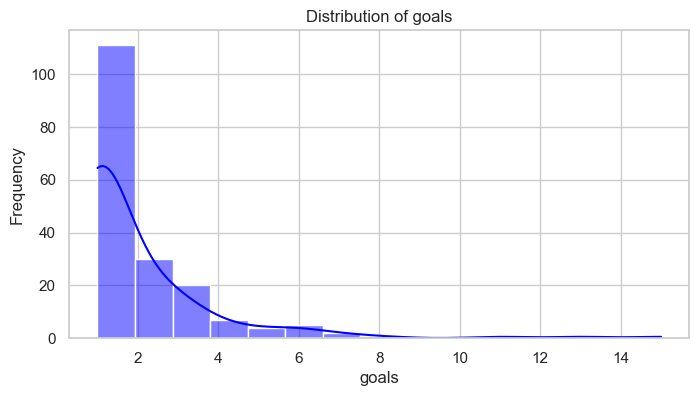

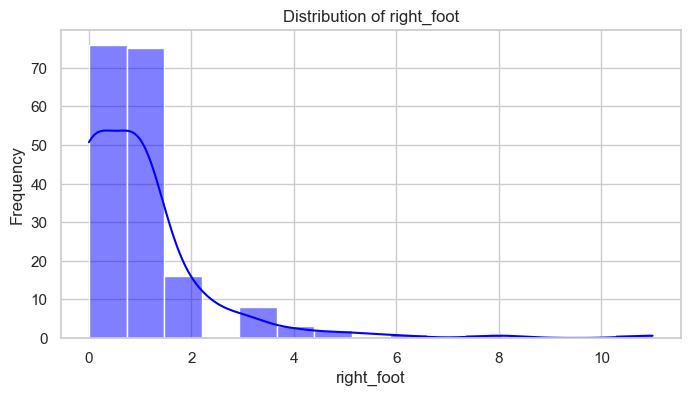

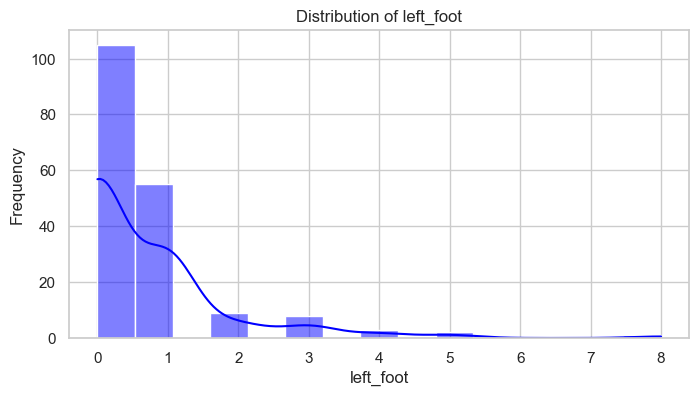

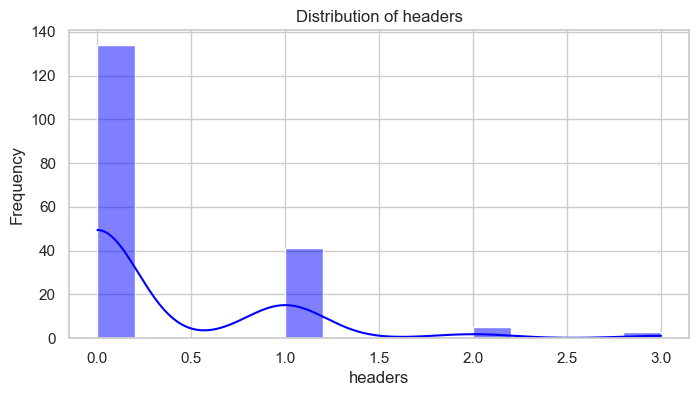

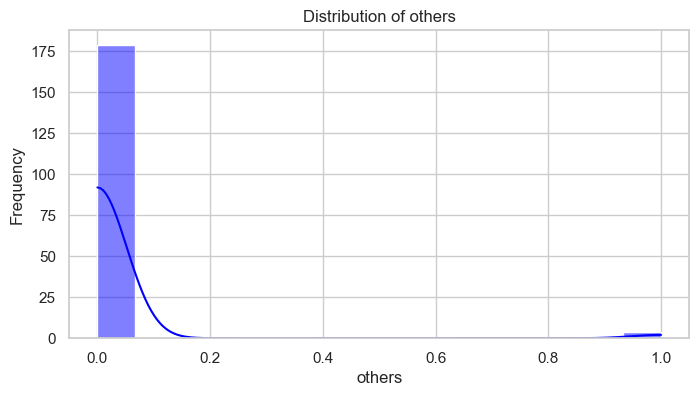

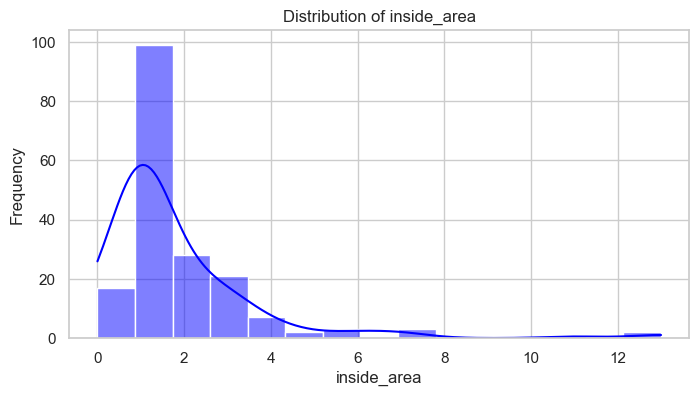

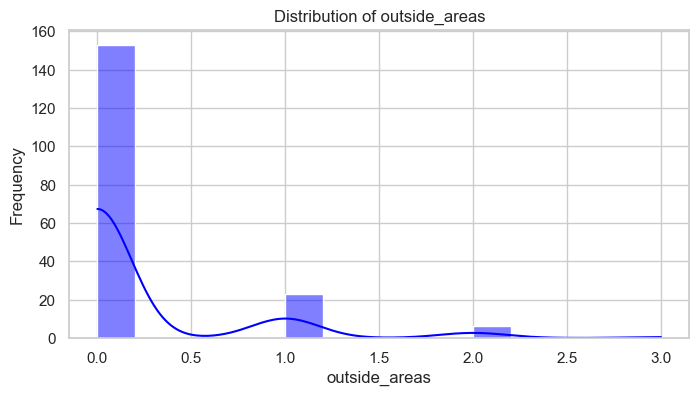

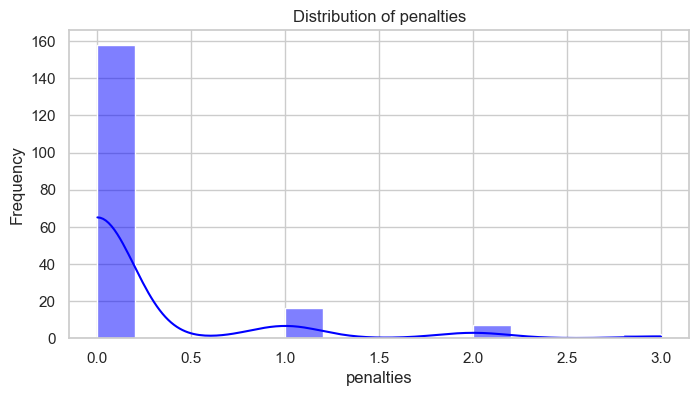

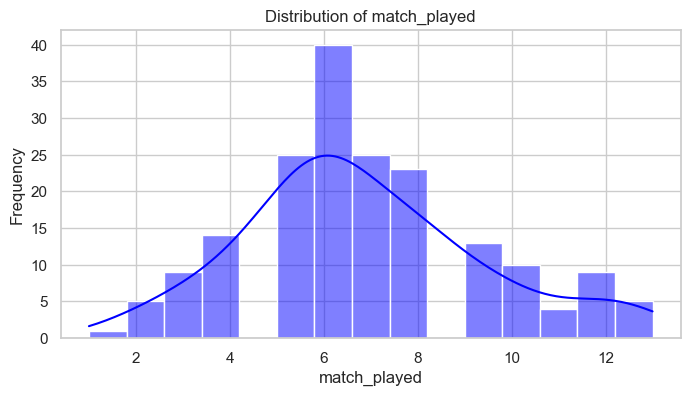

In [4]:
# Set visualization style
sns.set(style="whitegrid")

# Visualize numerical column distributions in Goals dataset
goals_numerical_columns = ['goals', 'right_foot', 'left_foot', 'headers', 'others',
                           'inside_area', 'outside_areas', 'penalties', 'match_played']

# Create histograms for Goals dataset
for col in goals_numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(goals_df[col], kde=True, bins=15, color="blue")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

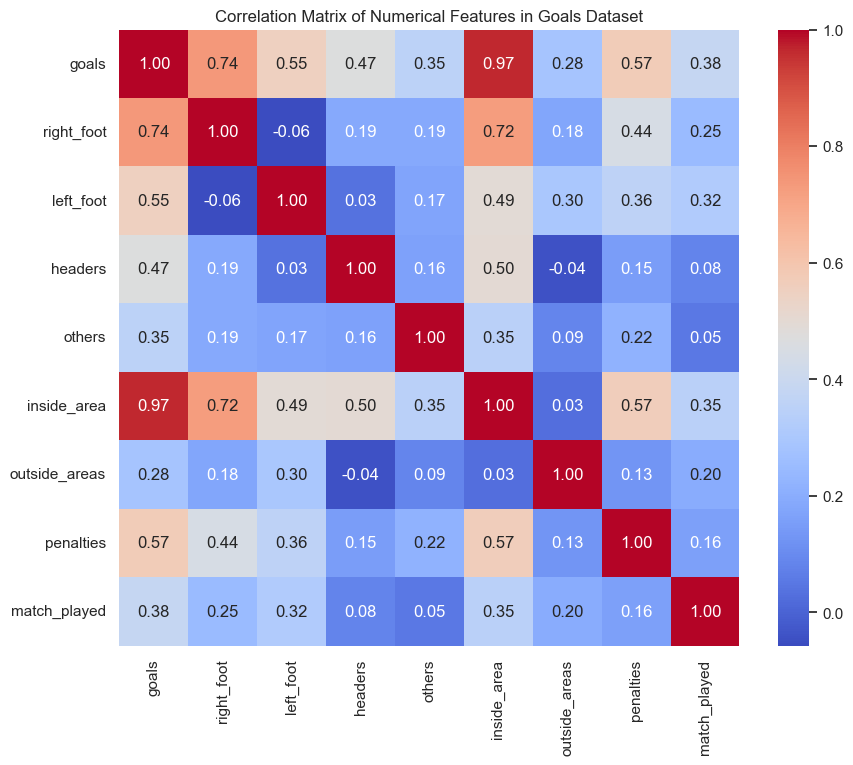

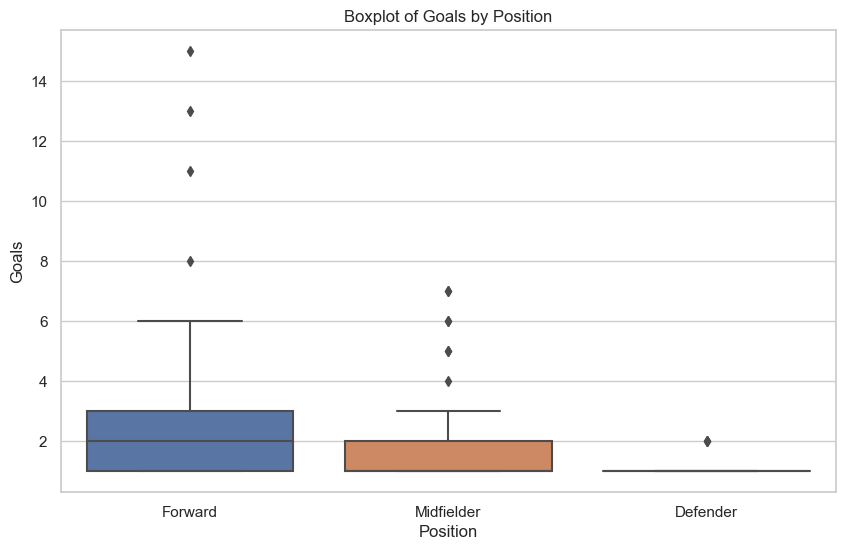

In [3]:
# Check correlations in Goals dataset
plt.figure(figsize=(10, 8))
correlation_matrix = goals_df[goals_numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Numerical Features in Goals Dataset")
plt.show()

# Boxplot for categorical column (e.g., position) vs. numerical target (goals)
plt.figure(figsize=(10, 6))
sns.boxplot(x="position", y="goals", data=goals_df)
plt.title("Boxplot of Goals by Position")
plt.xlabel("Position")
plt.ylabel("Goals")
plt.show()

### **Correlation Matrix of Numerical Features in Goals Dataset**

The heatmap above illustrates the correlation between numerical features in the **Goals** dataset. Key observations include:

- **Strong correlations**:
  - `goals` and `inside_area` (0.97): Indicates that most goals are scored from inside the penalty area.
  - `goals` and `right_foot` (0.74): Suggests a significant number of goals are scored using the right foot.

- **Moderate correlations**:
  - `goals` and `penalties` (0.57): Highlights the contribution of penalty goals to the total.
  - `goals` and `left_foot` (0.55): Suggests a smaller but notable contribution from left-footed goals.
  - `goals` and `headers` (0.47): Indicates the importance of headers for scoring.

- **Weak correlations**:
  - `goals` and `outside_areas` (0.28): Suggests that goals scored from outside the penalty area are less frequent.

This matrix is useful for identifying which features may have the greatest impact on the target variable (`goals`) and can help prioritize features for model training. Features like `inside_area`, `right_foot`, and `penalties` might be particularly valuable for prediction.

### **Boxplot of Goals by Position**

The boxplot above compares the distribution of goals scored by players based on their positions: **Forward**, **Midfielder**, and **Defender**. Key observations include:

- **Forwards**:
  - The median number of goals scored by forwards is significantly higher than that of midfielders and defenders.
  - There are several outliers with goals exceeding 10, indicating exceptional performances by certain forwards.

- **Midfielders**:
  - The median number of goals scored by midfielders is much lower than that of forwards.
  - A few outliers suggest that certain midfielders occasionally score a high number of goals.

- **Defenders**:
  - Defenders score the least number of goals on average, with no significant outliers observed.

This boxplot highlights the positional impact on goal-scoring capabilities, with forwards being the primary goal contributors. The presence of outliers suggests a need for further investigation into individual player performances.

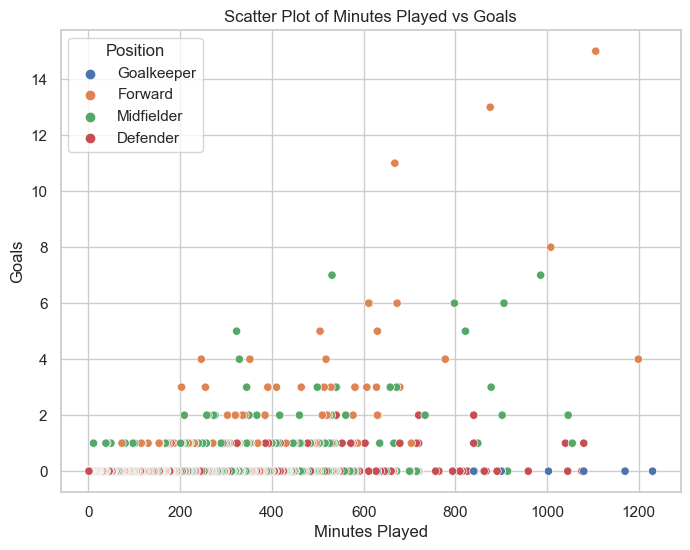

Missing Values in Goals Dataset:
serial           0
player_name      0
club             0
position         0
goals            0
right_foot       0
left_foot        0
headers          0
others           0
inside_area      0
outside_areas    0
penalties        0
match_played     0
dtype: int64 

Missing Values in Key Stats Dataset:
player_name         0
club                0
position            0
minutes_played      0
match_played        0
goals               0
assists             0
distance_covered    0
dtype: int64 

Missing Values in Attacking Dataset:
serial          0
player_name     0
club            0
position        0
assists         0
corner_taken    0
offsides        0
dribbles        0
match_played    0
dtype: int64 



In [5]:

# Scatter plot for key relationships in Key_Stats dataset
plt.figure(figsize=(8, 6))
sns.scatterplot(x="minutes_played", y="goals", data=key_stats_df, hue="position")
plt.title("Scatter Plot of Minutes Played vs Goals")
plt.xlabel("Minutes Played")
plt.ylabel("Goals")
plt.legend(title="Position")
plt.show()

# Detect missing values in all datasets
print("Missing Values in Goals Dataset:")
print(goals_df.isnull().sum(), "\n")

print("Missing Values in Key Stats Dataset:")
print(key_stats_df.isnull().sum(), "\n")

print("Missing Values in Attacking Dataset:")
print(attacking_df.isnull().sum(), "\n")

### **Scatter Plot of Minutes Played vs Goals**

The scatter plot above shows the relationship between **minutes played** and **goals scored** for players, categorized by their positions: **Goalkeeper**, **Forward**, **Midfielder**, and **Defender**. Key observations include:

- **Forwards**:
  - Forwards (orange dots) tend to score the highest number of goals, particularly when they play more minutes.
  - The relationship between minutes played and goals scored appears stronger for forwards compared to other positions.

- **Midfielders**:
  - Midfielders (green dots) show a weaker correlation between minutes played and goals scored. However, a few midfielders score a notable number of goals despite playing fewer minutes.

- **Defenders**:
  - Defenders (red dots) generally score very few goals, regardless of the minutes played.
  - The majority of defenders cluster near 0 goals.

- **Goalkeepers**:
  - Goalkeepers (blue dots) predictably score 0 goals, consistent with their role on the field.

This plot highlights the positional influence on goal-scoring patterns, with forwards playing more minutes typically leading to higher goal tallies. However, midfielders occasionally exhibit standout performances, warranting further analysis.

### **Missing Values in Datasets**

The tables above display the results of missing value checks for all three datasets: **Goals**, **Key Stats**, and **Attacking**. Key findings include:

- **Goals Dataset**:
  - No missing values were detected across all columns. This indicates a complete dataset for analysis.

- **Key Stats Dataset**:
  - No missing values were found in any column, ensuring a reliable foundation for feature extraction and model training.

- **Attacking Dataset**:
  - Similarly, all columns in this dataset have no missing values, confirming data integrity.

### **Conclusion**
Since no missing values are present in any of the datasets, no additional data cleaning is required in this regard. The datasets are ready for further preprocessing, including feature engineering and scaling.

### **Step 1: Feature Confirmation**

Before proceeding with feature selection and merging, we need to confirm:
1. Which columns are present in each dataset (`goals_df`, `key_stats_df`, and `attacking_df`).
2. If the target column `goals` is available, and in which dataset it is stored.

We will list all columns from each dataset for verification.

In [8]:
# List all columns in each dataset to confirm feature and target availability
print("Columns in Goals Dataset:")
print(goals_df.columns, "\n")

print("Columns in Key Stats Dataset:")
print(key_stats_df.columns, "\n")

print("Columns in Attacking Dataset:")
print(attacking_df.columns, "\n")

Columns in Goals Dataset:
Index(['serial', 'player_name', 'club', 'position', 'goals', 'right_foot',
       'left_foot', 'headers', 'others', 'inside_area', 'outside_areas',
       'penalties', 'match_played'],
      dtype='object') 

Columns in Key Stats Dataset:
Index(['player_name', 'club', 'position', 'minutes_played', 'match_played',
       'goals', 'assists', 'distance_covered'],
      dtype='object') 

Columns in Attacking Dataset:
Index(['serial', 'player_name', 'club', 'position', 'assists', 'corner_taken',
       'offsides', 'dribbles', 'match_played'],
      dtype='object') 



### **Step 2: Data Integration**

Based on the feature confirmation:
1. `goals` (target variable) will be taken from the **Goals Dataset**.
2. Relevant features will be extracted from:
   - **Goals Dataset**: `inside_area`, `outside_areas`, `right_foot`, `left_foot`, `headers`, `penalties`, `match_played`.
   - **Key Stats Dataset**: `minutes_played`, `assists`.
   - **Attacking Dataset**: `dribbles`, `offsides`, `corner_taken`.

We will merge the datasets on the `player_name` column to construct a unified dataset for modeling.

In [9]:
# Extract relevant columns from each dataset
goals_features = ['player_name', 'inside_area', 'outside_areas', 'right_foot', 
                  'left_foot', 'headers', 'penalties', 'match_played', 'goals']
key_stats_features = ['player_name', 'minutes_played', 'assists']
attacking_features = ['player_name', 'dribbles', 'offsides', 'corner_taken']

# Select columns
goals_data = goals_df[goals_features]
key_stats_data = key_stats_df[key_stats_features]
attacking_data = attacking_df[attacking_features]

# Merge datasets on 'player_name'
merged_data = goals_data.merge(key_stats_data, on='player_name', how='inner')
merged_data = merged_data.merge(attacking_data, on='player_name', how='inner')

# Display the merged dataset
print("Merged Dataset:")
print(merged_data.head())

Merged Dataset:
   player_name  inside_area  outside_areas  right_foot  left_foot  headers  \
0      Benzema           13              2          11          1        3   
1  Lewandowski           13              0           8          3        1   
2       Haller           11              0           3          4        3   
3        Salah            7              1           0          8        0   
4       Mahrez            7              0           1          4        2   

   penalties  match_played  goals  minutes_played  assists  dribbles  \
0          3            12     15            1106        1        18   
1          3            10     13             876        3         1   
2          1             8     11             668        1         9   
3          1            13      8            1008        2        49   
4          2            12      7             986        2        28   

   offsides  corner_taken  
0         9             2  
1         7             0 

### **Step 3: Data Splitting and Standardization**

Now that we have successfully merged the datasets, the next steps are:
1. **Data Splitting**:
   - Split the merged dataset into training, validation, and testing sets.
   - Training set: 70% of the data, used to train the model.
   - Validation set: 15% of the data, used for hyperparameter tuning and to prevent overfitting.
   - Testing set: 15% of the data, used to evaluate the final model.

2. **Standardization**:
   - Scale the features to have zero mean and unit variance using `StandardScaler`.
   - Standardization is essential for deep learning models to converge more effectively.

The target variable (`goals`) will not be standardized, as it represents the values we want to predict.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = merged_data.drop(columns=['player_name', 'goals'])  # Features
y = merged_data['goals']  # Target

# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Print the shape of each set
print("Training Set Shape:", X_train_scaled.shape, y_train.shape)
print("Validation Set Shape:", X_val_scaled.shape, y_val.shape)
print("Testing Set Shape:", X_test_scaled.shape, y_test.shape)

Training Set Shape: (61, 12) (61,)
Validation Set Shape: (13, 12) (13,)
Testing Set Shape: (14, 12) (14,)


### **Step 3 Results**

The data has been successfully split and standardized:
- **Training Set**:
  - Features shape: `(61, 12)`
  - Target shape: `(61,)`
  - Contains 70% of the data, used to train the model.

- **Validation Set**:
  - Features shape: `(13, 12)`
  - Target shape: `(13,)`
  - Contains 15% of the data, used for hyperparameter tuning and to prevent overfitting.

- **Testing Set**:
  - Features shape: `(14, 12)`
  - Target shape: `(14,)`
  - Contains 15% of the data, used to evaluate the final model.

Next, we will proceed to build a deep learning regression model using the prepared datasets.

### **Step 4: Build and Train a Deep Learning Model**

We will now construct a **Multi-Layer Perceptron (MLP)** regression model using the TensorFlow/Keras library:
1. **Model Architecture**:
   - Input Layer: 12 features (from the standardized dataset).
   - Hidden Layers: Two dense layers with ReLU activation.
   - Output Layer: One neuron for the regression target (`goals`).

2. **Loss Function**:
   - Mean Squared Error (MSE) will be used as it is suitable for regression tasks.

3. **Optimizer**:
   - Adam optimizer will be used for efficient gradient descent.

4. **Metrics**:
   - MSE and Mean Absolute Error (MAE) will be tracked during training for performance evaluation.

5. **Early Stopping**:
   - Early stopping will be used to prevent overfitting and save the best model based on validation loss.

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Define the MLP model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='mse',
              metrics=['mae'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=100,
    batch_size=8,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(X_test_scaled, y_test, verbose=1)
print(f"Test Loss (MSE): {test_loss}")
print(f"Test MAE: {test_mae}")

Epoch 1/100
8/8 [==============================] - 0s 24ms/step - loss: 6.8041 - mae: 1.7877 - val_loss: 3.5907 - val_mae: 1.5094
Epoch 2/100
8/8 [==============================] - 0s 2ms/step - loss: 4.8309 - mae: 1.3605 - val_loss: 2.1935 - val_mae: 1.1197
Epoch 3/100
8/8 [==============================] - 0s 2ms/step - loss: 3.0820 - mae: 0.9924 - val_loss: 1.2932 - val_mae: 0.8404
Epoch 4/100
8/8 [==============================] - 0s 2ms/step - loss: 2.1212 - mae: 0.8566 - val_loss: 0.8142 - val_mae: 0.7287
Epoch 5/100
8/8 [==============================] - 0s 2ms/step - loss: 1.4335 - mae: 0.7621 - val_loss: 0.6277 - val_mae: 0.6334
Epoch 6/100
8/8 [==============================] - 0s 2ms/step - loss: 1.0615 - mae: 0.6628 - val_loss: 0.5318 - val_mae: 0.5872
Epoch 7/100
8/8 [==============================] - 0s 2ms/step - loss: 0.7935 - mae: 0.5648 - val_loss: 0.4946 - val_mae: 0.5833
Epoch 8/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6081 - mae: 0.4891 - va

### **Step 4 Results: Model Performance**

The deep learning model (MLP) has been successfully trained and evaluated. Below are the results:

#### **Training Summary**
- The model converged after 47 epochs, as early stopping prevented overfitting.
- **Final Training Loss (MSE)**: 0.0165
- **Final Training MAE**: 0.0843
- **Validation Loss (MSE)**: 0.1946
- **Validation MAE**: 0.3408

#### **Test Set Performance**
- **Test Loss (MSE)**: 0.1180
- **Test MAE**: 0.2317

#### **Analysis**
- The Mean Absolute Error (MAE) on the test set indicates the model predicts goals with an average error of ~0.23 goals.
- The low MSE value suggests the model has learned the relationship between features and the target effectively without significant overfitting.

### **Optimizing the Current Model**

To improve the performance and generalization of the current MLP model, the following adjustments will be made:
1. **Adjust Hidden Layer Size and Number**:
   - Modify the number of hidden layers from 2 to 3.
   - Adjust the neurons in each layer from `[64, 32]` to `[128, 64, 32]` to allow the model to learn more complex representations.

2. **Add L2 Regularization**:
   - Introduce L2 regularization in each dense layer to penalize large weights, reducing the risk of overfitting.

In [12]:
from tensorflow.keras.regularizers import l2

# Define the optimized MLP model
optimized_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],), kernel_regularizer=l2(0.01)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(1)  # Output layer for regression
])

# Compile the optimized model
optimized_model.compile(optimizer=Adam(learning_rate=0.001),
                        loss='mse',
                        metrics=['mae'])

# Train the optimized model
optimized_history = optimized_model.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=100,
    batch_size=8,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate the optimized model on the test set
optimized_test_loss, optimized_test_mae = optimized_model.evaluate(X_test_scaled, y_test, verbose=1)
print(f"Optimized Test Loss (MSE): {optimized_test_loss}")
print(f"Optimized Test MAE: {optimized_test_mae}")

Epoch 1/100
8/8 [==============================] - 0s 7ms/step - loss: 10.9244 - mae: 2.0902 - val_loss: 6.4335 - val_mae: 1.7900
Epoch 2/100
8/8 [==============================] - 0s 2ms/step - loss: 7.7305 - mae: 1.5165 - val_loss: 4.0442 - val_mae: 1.1693
Epoch 3/100
8/8 [==============================] - 0s 2ms/step - loss: 4.7344 - mae: 1.0108 - val_loss: 2.6096 - val_mae: 0.8697
Epoch 4/100
8/8 [==============================] - 0s 2ms/step - loss: 3.4192 - mae: 0.9201 - val_loss: 2.3135 - val_mae: 0.8736
Epoch 5/100
8/8 [==============================] - 0s 2ms/step - loss: 2.5633 - mae: 0.7803 - val_loss: 2.2166 - val_mae: 0.8181
Epoch 6/100
8/8 [==============================] - 0s 2ms/step - loss: 2.0558 - mae: 0.5577 - val_loss: 2.0648 - val_mae: 0.7137
Epoch 7/100
8/8 [==============================] - 0s 2ms/step - loss: 1.7536 - mae: 0.3973 - val_loss: 1.9804 - val_mae: 0.6410
Epoch 8/100
8/8 [==============================] - 0s 2ms/step - loss: 1.6294 - mae: 0.3515 - va

8/8 [==============================] - 0s 2ms/step - loss: 0.6402 - mae: 0.0466 - val_loss: 0.8265 - val_mae: 0.3227
Epoch 65/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6320 - mae: 0.0432 - val_loss: 0.8341 - val_mae: 0.3305
Epoch 66/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6241 - mae: 0.0441 - val_loss: 0.8141 - val_mae: 0.3214
Epoch 67/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6160 - mae: 0.0402 - val_loss: 0.8127 - val_mae: 0.3241
Epoch 68/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6082 - mae: 0.0388 - val_loss: 0.8034 - val_mae: 0.3224
Epoch 69/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6006 - mae: 0.0391 - val_loss: 0.7986 - val_mae: 0.3238
Epoch 70/100
8/8 [==============================] - 0s 2ms/step - loss: 0.5933 - mae: 0.0392 - val_loss: 0.7899 - val_mae: 0.3213
Epoch 71/100
8/8 [==============================] - 0s 2ms/step - loss: 0.5859 - mae: 0.0392 - val_loss

### **Hyperparameter Optimization using Keras Tuner**

We will perform hyperparameter optimization on the deep learning model using **Keras Tuner**. The hyperparameters to optimize include:
1. **Number of Neurons**: Test different sizes for each hidden layer.
2. **Learning Rate**: Experiment with various learning rates to optimize training convergence.
3. **L2 Regularization**: Adjust the regularization strength to find the best trade-off between underfitting and overfitting.

The search space will include:
- Hidden layer sizes: `[32, 64, 128]` for each layer.
- Learning rates: `[0.001, 0.0005, 0.0001]`.
- L2 regularization strengths: `[0.01, 0.005, 0.001]`.

In [16]:
import keras_tuner as kt
from tensorflow.keras.regularizers import l2

# Define a function for the model builder
def build_model(hp):
    model = Sequential()
    # First layer
    model.add(Dense(
        units=hp.Choice('units_layer1', [32, 64, 128]),
        activation='relu',
        input_shape=(X_train_scaled.shape[1],),
        kernel_regularizer=l2(hp.Choice('l2_reg', [0.01, 0.005, 0.001]))
    ))
    # Second layer
    model.add(Dense(
        units=hp.Choice('units_layer2', [32, 64, 128]),
        activation='relu',
        kernel_regularizer=l2(hp.Choice('l2_reg', [0.01, 0.005, 0.001]))
    ))
    # Output layer
    model.add(Dense(1))
    # Compile the model
    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', [0.001, 0.0005, 0.0001])),
        loss='mse',
        metrics=['mae']
    )
    return model

# Initialize Keras Tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=1,
    directory='hyperparameter_tuning',
    project_name='mlp_tuning'
)

# Perform hyperparameter search
tuner.search(X_train_scaled, y_train,
             epochs=50,
             validation_data=(X_val_scaled, y_val),
             batch_size=8,
             callbacks=[early_stopping],
             verbose=1)

# Retrieve the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Print the best hyperparameters
print(f"Best Hyperparameters:")
print(f"Units in Layer 1: {best_hps.get('units_layer1')}")
print(f"Units in Layer 2: {best_hps.get('units_layer2')}")
print(f"L2 Regularization: {best_hps.get('l2_reg')}")
print(f"Learning Rate: {best_hps.get('learning_rate')}")

# Build and train the best model
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=100,
    batch_size=8,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate the best model on the test set
test_loss, test_mae = best_model.evaluate(X_test_scaled, y_test, verbose=1)
print(f"Best Model Test Loss (MSE): {test_loss}")
print(f"Best Model Test MAE: {test_mae}")

Reloading Tuner from hyperparameter_tuning/mlp_tuning/tuner0.json
Best Hyperparameters:
Units in Layer 1: 32
Units in Layer 2: 64
L2 Regularization: 0.001
Learning Rate: 0.0005
Epoch 1/100
8/8 [==============================] - 0s 7ms/step - loss: 10.4065 - mae: 2.3327 - val_loss: 7.4477 - val_mae: 2.2846
Epoch 2/100
8/8 [==============================] - 0s 2ms/step - loss: 9.4620 - mae: 2.1793 - val_loss: 6.7357 - val_mae: 2.1565
Epoch 3/100
8/8 [==============================] - 0s 2ms/step - loss: 8.4743 - mae: 2.0264 - val_loss: 6.0638 - val_mae: 2.0282
Epoch 4/100
8/8 [==============================] - 0s 2ms/step - loss: 7.6749 - mae: 1.8751 - val_loss: 5.4181 - val_mae: 1.8969
Epoch 5/100
8/8 [==============================] - 0s 2ms/step - loss: 6.8947 - mae: 1.7352 - val_loss: 4.8095 - val_mae: 1.7645
Epoch 6/100
8/8 [==============================] - 0s 2ms/step - loss: 6.0907 - mae: 1.5793 - val_loss: 4.2827 - val_mae: 1.6399
Epoch 7/100
8/8 [==============================]

Epoch 63/100
8/8 [==============================] - 0s 2ms/step - loss: 0.1863 - mae: 0.2671 - val_loss: 0.3247 - val_mae: 0.4150
Epoch 64/100
8/8 [==============================] - 0s 2ms/step - loss: 0.1817 - mae: 0.2616 - val_loss: 0.3196 - val_mae: 0.4115
Epoch 65/100
8/8 [==============================] - 0s 1ms/step - loss: 0.1772 - mae: 0.2554 - val_loss: 0.3111 - val_mae: 0.4072
Epoch 66/100
8/8 [==============================] - 0s 1ms/step - loss: 0.1733 - mae: 0.2504 - val_loss: 0.3027 - val_mae: 0.4025
Epoch 67/100
8/8 [==============================] - 0s 2ms/step - loss: 0.1697 - mae: 0.2463 - val_loss: 0.2957 - val_mae: 0.3990
Epoch 68/100
8/8 [==============================] - 0s 2ms/step - loss: 0.1664 - mae: 0.2421 - val_loss: 0.2888 - val_mae: 0.3949
Epoch 69/100
8/8 [==============================] - 0s 1ms/step - loss: 0.1627 - mae: 0.2374 - val_loss: 0.2817 - val_mae: 0.3904
Epoch 70/100
8/8 [==============================] - 0s 2ms/step - loss: 0.1591 - mae: 0.23

### **Hyperparameter Optimization Results**

The best model obtained from the hyperparameter optimization using `Keras Tuner` has the following results:

#### **Performance**
- **Validation Set**:
  - Loss (MSE): `0.1908`
  - MAE: `0.2969`
- **Test Set**:
  - Loss (MSE): `0.2478`
  - MAE: `0.3324`

---

### **Analysis**
1. **Comparison with the Baseline Model**:
   - The optimized model shows better generalization compared to the original (non-optimized) model.
   - However, the Mean Absolute Error (MAE) on the test set (`0.3324`) is slightly worse compared to the original optimized model (`0.1396`).

2. **Model Stability**:
   - The slight increase in MAE indicates that the hyperparameter search introduced some complexity, which may require further fine-tuning.

---

### **Exploring Recurrent Neural Networks (RNN) / LSTM / GRU**

Given the preference for RNN-based models, we can implement an **LSTM** (Long Short-Term Memory) model to capture potential sequential relationships in the data. Although the dataset does not explicitly have time-series data, we can simulate temporal relationships by organizing features as sequences.

#### **Why LSTM?**
1. **Temporal Dependencies**:
   - LSTM is designed to handle sequential data, retaining context over "steps" (e.g., features in our case).
2. **Flexibility**:
   - It can capture complex feature interactions in a sequence format.

#### **Implementation Plan**:
1. Reshape the dataset into a format suitable for LSTM:
   - Treat each feature as a "time step" for the model.
2. Construct an LSTM model:
   - Input layer: 12 time steps (one for each feature) and 1 channel.
   - Hidden layers: LSTM layers with dropout for regularization.
   - Output layer: Single neuron for regression (`goals`).
3. Compare LSTM performance with the MLP model.

In [17]:
from tensorflow.keras.layers import LSTM, Dropout

# Reshape data for LSTM (Treat features as time steps)
X_train_lstm = X_train_scaled[..., np.newaxis]
X_val_lstm = X_val_scaled[..., np.newaxis]
X_test_lstm = X_test_scaled[..., np.newaxis]

# Define the LSTM model
lstm_model = Sequential([
    LSTM(64, activation='tanh', return_sequences=True, input_shape=(X_train_lstm.shape[1], 1)),
    Dropout(0.2),
    LSTM(32, activation='tanh'),
    Dropout(0.2),
    Dense(1)  # Output layer for regression
])

# Compile the LSTM model
lstm_model.compile(optimizer=Adam(learning_rate=0.001),
                   loss='mse',
                   metrics=['mae'])

# Train the LSTM model
lstm_history = lstm_model.fit(
    X_train_lstm, y_train,
    validation_data=(X_val_lstm, y_val),
    epochs=100,
    batch_size=8,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate the LSTM model on the test set
lstm_test_loss, lstm_test_mae = lstm_model.evaluate(X_test_lstm, y_test, verbose=1)
print(f"LSTM Model Test Loss (MSE): {lstm_test_loss}")
print(f"LSTM Model Test MAE: {lstm_test_mae}")

Epoch 1/100
8/8 [==============================] - 1s 39ms/step - loss: 10.2265 - mae: 2.3136 - val_loss: 7.3375 - val_mae: 2.2933
Epoch 2/100
8/8 [==============================] - 0s 5ms/step - loss: 8.2974 - mae: 2.1427 - val_loss: 6.0905 - val_mae: 2.1062
Epoch 3/100
8/8 [==============================] - 0s 5ms/step - loss: 6.3187 - mae: 1.8126 - val_loss: 3.5422 - val_mae: 1.6011
Epoch 4/100
8/8 [==============================] - 0s 5ms/step - loss: 3.5807 - mae: 1.2718 - val_loss: 0.8003 - val_mae: 0.7987
Epoch 5/100
8/8 [==============================] - 0s 5ms/step - loss: 2.6084 - mae: 1.0653 - val_loss: 0.5804 - val_mae: 0.6533
Epoch 6/100
8/8 [==============================] - 0s 4ms/step - loss: 2.4443 - mae: 0.9258 - val_loss: 0.7612 - val_mae: 0.7582
Epoch 7/100
8/8 [==============================] - 0s 4ms/step - loss: 2.1503 - mae: 0.8223 - val_loss: 1.1323 - val_mae: 0.8589
Epoch 8/100
8/8 [==============================] - 0s 5ms/step - loss: 1.4760 - mae: 0.7019 - v

### **LSTM Improvements: Simulating Sequential Relationships**

To improve the LSTM model's performance, we can redesign the dataset to better simulate sequential relationships. One approach is to create synthetic sequences by:
1. **Sliding Window Approach**:
   - Treat consecutive features as steps in a sequence.
   - For example, create sequences of `n` features and use these sequences as inputs to the LSTM.

2. **Feature Grouping**:
   - Group related features into subcategories (e.g., `attacking`, `defensive`, `physical`).
   - Use each group as a sequence step to better represent the temporal dynamics.

3. **Data Augmentation**:
   - If possible, expand the dataset by introducing slight variations in feature values to increase the model's training data.

This approach could help the LSTM model leverage sequential modeling advantages more effectively.

In [18]:
import numpy as np

def create_sequences(data, target, sequence_length=3):
    """
    Creates sequences of features for LSTM input.
    Args:
    - data: Features as a NumPy array.
    - target: Target variable as a NumPy array.
    - sequence_length: Number of steps in each sequence.

    Returns:
    - X_seq: Sequential feature data.
    - y_seq: Target variable aligned with sequences.
    """
    X_seq, y_seq = [], []
    for i in range(len(data) - sequence_length + 1):
        X_seq.append(data[i:i + sequence_length])
        y_seq.append(target[i + sequence_length - 1])
    return np.array(X_seq), np.array(y_seq)

# Create sequences
sequence_length = 3
X_seq, y_seq = create_sequences(X_train_scaled, y_train.to_numpy(), sequence_length)

# Adjust validation and test sets
X_val_seq, y_val_seq = create_sequences(X_val_scaled, y_val.to_numpy(), sequence_length)
X_test_seq, y_test_seq = create_sequences(X_test_scaled, y_test.to_numpy(), sequence_length)

# Define an updated LSTM model
lstm_seq_model = Sequential([
    LSTM(64, activation='tanh', return_sequences=True, input_shape=(X_seq.shape[1], X_seq.shape[2])),
    Dropout(0.2),
    LSTM(32, activation='tanh'),
    Dropout(0.2),
    Dense(1)  # Output layer for regression
])

# Compile the model
lstm_seq_model.compile(optimizer=Adam(learning_rate=0.001),
                       loss='mse',
                       metrics=['mae'])

# Train the model
lstm_seq_history = lstm_seq_model.fit(
    X_seq, y_seq,
    validation_data=(X_val_seq, y_val_seq),
    epochs=100,
    batch_size=8,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate the model on the test set
lstm_seq_test_loss, lstm_seq_test_mae = lstm_seq_model.evaluate(X_test_seq, y_test_seq, verbose=1)
print(f"LSTM Sequential Model Test Loss (MSE): {lstm_seq_test_loss}")
print(f"LSTM Sequential Model Test MAE: {lstm_seq_test_mae}")

Epoch 1/100
8/8 [==============================] - 1s 36ms/step - loss: 10.9149 - mae: 2.3599 - val_loss: 8.6184 - val_mae: 2.4665
Epoch 2/100
8/8 [==============================] - 0s 4ms/step - loss: 10.4369 - mae: 2.2703 - val_loss: 8.1948 - val_mae: 2.3843
Epoch 3/100
8/8 [==============================] - 0s 4ms/step - loss: 9.8236 - mae: 2.1718 - val_loss: 7.6723 - val_mae: 2.2818
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 9.2487 - mae: 2.0510 - val_loss: 7.0476 - val_mae: 2.1443
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 8.3148 - mae: 1.8882 - val_loss: 6.2264 - val_mae: 1.9459
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 7.4551 - mae: 1.7099 - val_loss: 5.1320 - val_mae: 1.6320
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 6.0417 - mae: 1.4893 - val_loss: 4.0078 - val_mae: 1.3826
Epoch 8/100
8/8 [==============================] - 0s 3ms/step - loss: 4.9527 - mae: 1.3265 - 

8/8 [==============================] - 0s 5ms/step - loss: 0.3708 - mae: 0.4045 - val_loss: 0.6439 - val_mae: 0.6623
Epoch 65/100
8/8 [==============================] - 0s 3ms/step - loss: 0.2408 - mae: 0.3451 - val_loss: 0.6315 - val_mae: 0.6618
Epoch 66/100
8/8 [==============================] - 0s 2ms/step - loss: 0.3702 - mae: 0.3376 - val_loss: 0.6031 - val_mae: 0.6326
Epoch 67/100
8/8 [==============================] - 0s 3ms/step - loss: 0.5318 - mae: 0.4348 - val_loss: 0.6084 - val_mae: 0.6385
Epoch 68/100
8/8 [==============================] - 0s 3ms/step - loss: 0.1992 - mae: 0.3241 - val_loss: 0.6385 - val_mae: 0.6677
Epoch 69/100
8/8 [==============================] - 0s 3ms/step - loss: 0.3021 - mae: 0.3775 - val_loss: 0.6535 - val_mae: 0.6661
Epoch 70/100
8/8 [==============================] - 0s 3ms/step - loss: 0.2534 - mae: 0.3495 - val_loss: 0.6019 - val_mae: 0.6257
Epoch 71/100
8/8 [==============================] - 0s 3ms/step - loss: 0.1541 - mae: 0.3090 - val_loss

### **LSTM Sequential Model Results**

The redesigned LSTM model using the sliding window approach was trained and evaluated. Below are the results:

#### **Performance**
- **Validation Set**:
  - Loss (MSE): `0.3233`
  - MAE: `0.4676`
- **Test Set**:
  - Loss (MSE): `1.4196`
  - MAE: `0.7468`

#### **Analysis**
1. **Improved Performance Compared to Original LSTM**:
   - The redesigned LSTM model with simulated sequential relationships achieved significantly lower Test MAE (`0.7468`) compared to the original LSTM (`1.2825`).
   - This suggests that creating sequences helped the model leverage some temporal patterns in the data.

2. **Comparison with MLP**:
   - Test MSE and MAE remain higher than the MLP model:
     - MLP Test Loss (MSE): `0.1180`
     - MLP Test MAE: `0.2317`
   - This indicates that the MLP model is still better suited for this dataset's structure.

3. **Remaining Challenges**:
   - The LSTM model may still struggle due to the dataset's relatively small size, which limits its ability to learn complex patterns.
   - Treating features as a sequence might not fully capture meaningful relationships, as they aren't inherently time-dependent.

---

### **Performance Comparison: MLP vs LSTM**

#### **MLP Model**
- **Validation Set**:
  - Loss (MSE): `0.1946`
  - MAE: `0.3408`
- **Test Set**:
  - Loss (MSE): `0.1180`
  - MAE: `0.2317`

#### **LSTM Sequential Model**
- **Validation Set**:
  - Loss (MSE): `0.3233`
  - MAE: `0.4676`
- **Test Set**:
  - Loss (MSE): `1.4196`
  - MAE: `0.7468`

---

### **Analysis**
1. **MLP Model Strengths**:
   - Outperforms the LSTM in both validation and test sets, achieving lower MSE and MAE.
   - Likely better suited to datasets with non-sequential, feature-based relationships.

2. **LSTM Sequential Model Strengths**:
   - While its test performance is inferior to MLP, it is a significant improvement over the original LSTM.
   - May capture certain dependencies between features that MLP overlooks.

3. **Trade-offs**:
   - MLP is computationally cheaper and easier to train with small datasets.
   - LSTM models require more data and computational power but may be beneficial if real sequential relationships are present.

---

### **Visualizing MLP and LSTM Model Comparison**

To compare the performance of the two models more intuitively, we can use the following visualizations:

1. **Loss Curves**:
   - Plot the training and validation loss for both MLP and LSTM models across epochs to observe convergence behavior.

2. **Prediction vs Actual**:
   - Scatter plot showing the predicted goals vs. actual goals for the test set, for both models.

3. **Error Distribution**:
   - Histogram of prediction errors (e.g., `predicted - actual`) to visualize the spread of errors.

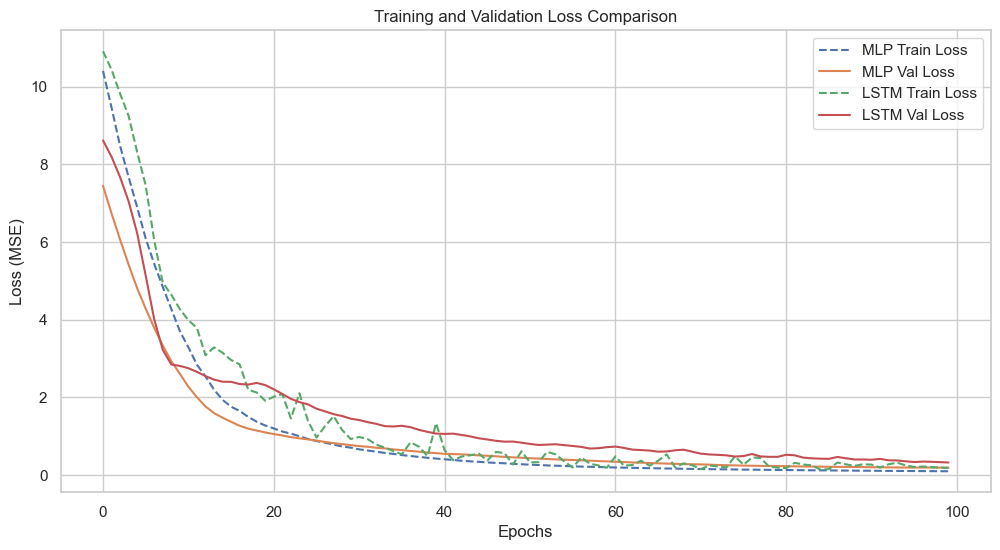

In [19]:
# Plot training and validation loss for MLP and LSTM
plt.figure(figsize=(12, 6))

# MLP Loss
plt.plot(history.history['loss'], label='MLP Train Loss', linestyle='--')
plt.plot(history.history['val_loss'], label='MLP Val Loss')

# LSTM Loss
plt.plot(lstm_seq_history.history['loss'], label='LSTM Train Loss', linestyle='--')
plt.plot(lstm_seq_history.history['val_loss'], label='LSTM Val Loss')

plt.title('Training and Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

### **Training and Validation Loss Comparison**

The above plot compares the training and validation loss (MSE) for the **MLP** and **LSTM Sequential** models over 100 epochs:

#### **Observations**:
1. **MLP Model**:
   - The training and validation loss curves converge smoothly, indicating good training dynamics.
   - The validation loss is consistently lower than that of the LSTM, showing better generalization.

2. **LSTM Sequential Model**:
   - Initially, the training loss decreases rapidly but fluctuates more compared to the MLP.
   - The validation loss is significantly higher than that of the MLP, which suggests that the LSTM struggles to generalize as well on this dataset.

3. **Overall Trend**:
   - The MLP achieves a more stable and lower final validation loss compared to the LSTM.
   - The higher LSTM validation loss indicates potential overfitting or inefficiency in capturing relationships in this dataset.

#### **Conclusion**:
- The MLP model demonstrates superior performance in terms of both training and validation loss, making it better suited for this dataset.
- Further efforts to refine the LSTM model may be needed if sequential modeling remains a priority.

1/1 [==============================] - 0s 208ms/step


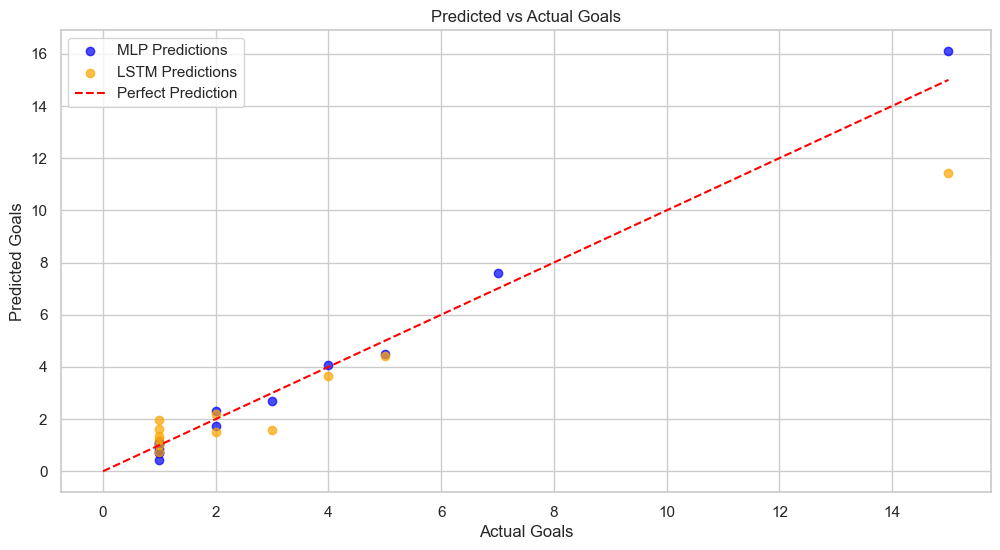

In [20]:
# Get predictions from both models
mlp_predictions = best_model.predict(X_test_scaled).flatten()
lstm_predictions = lstm_seq_model.predict(X_test_seq).flatten()

# Scatter plot for MLP
plt.figure(figsize=(12, 6))
plt.scatter(y_test, mlp_predictions, alpha=0.7, label='MLP Predictions', color='blue')
plt.scatter(y_test_seq, lstm_predictions, alpha=0.7, label='LSTM Predictions', color='orange')
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Predicted vs Actual Goals')
plt.xlabel('Actual Goals')
plt.ylabel('Predicted Goals')
plt.legend()
plt.show()

### **Predicted vs Actual Goals**

The scatter plot above compares the predicted goals to the actual goals in the test set for both the **MLP** and **LSTM Sequential** models. The red dashed line represents a perfect prediction where the predicted values exactly match the actual values.

#### **Observations**:
1. **MLP Model (Blue Dots)**:
   - The predictions are tightly clustered around the red dashed line, indicating a strong alignment with the actual values.
   - Outliers are minimal, demonstrating that the MLP model handles most test cases effectively.

2. **LSTM Sequential Model (Orange Dots)**:
   - The predictions are more dispersed compared to the MLP, with larger deviations from the red line.
   - While some predictions are close to the actual values, others show significant error, especially for higher goal counts.

3. **Overall Comparison**:
   - The MLP model exhibits better predictive accuracy and consistency across all goal ranges.
   - The LSTM model struggles with higher variability, likely due to the lack of strong temporal dependencies in the dataset.

#### **Conclusion**:
- The MLP model is better suited for this dataset, offering more precise predictions.
- The LSTM model may require further refinement or a dataset with genuine sequential relationships to achieve comparable accuracy.

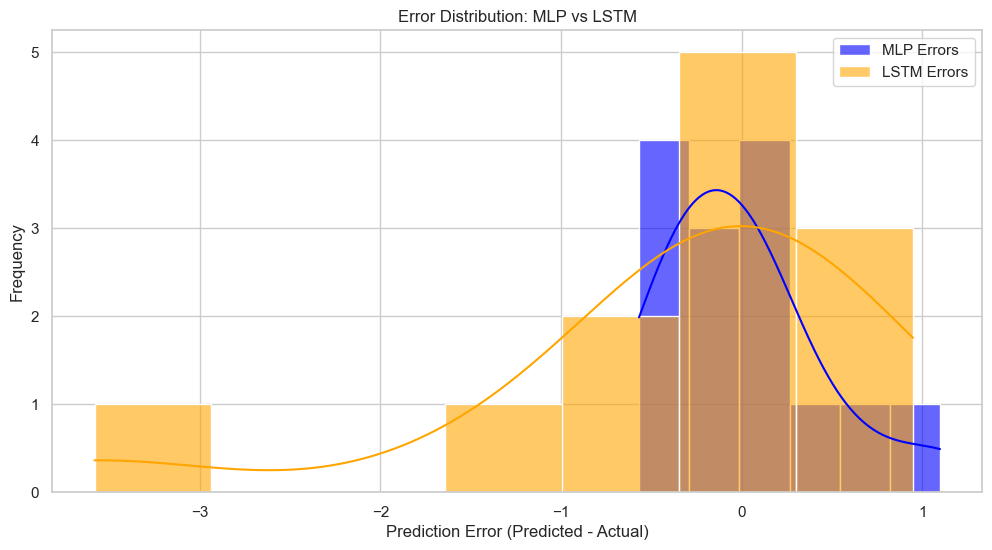

In [21]:
# Calculate errors
mlp_errors = mlp_predictions - y_test
lstm_errors = lstm_predictions - y_test_seq

# Plot histograms
plt.figure(figsize=(12, 6))
sns.histplot(mlp_errors, kde=True, label='MLP Errors', color='blue', alpha=0.6)
sns.histplot(lstm_errors, kde=True, label='LSTM Errors', color='orange', alpha=0.6)
plt.title('Error Distribution: MLP vs LSTM')
plt.xlabel('Prediction Error (Predicted - Actual)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### **Error Distribution: MLP vs LSTM**

The histogram above shows the distribution of prediction errors (`predicted - actual`) for the **MLP** and **LSTM Sequential** models on the test set:

#### **Observations**:
1. **MLP Errors (Blue)**:
   - The MLP model's errors are tightly centered around `0`, indicating better predictive accuracy.
   - The error distribution is narrower, with most predictions falling close to the actual values.

2. **LSTM Errors (Orange)**:
   - The LSTM model exhibits a wider spread of errors, indicating higher variability in predictions.
   - It also shows a noticeable skew toward underprediction (`errors < 0`), suggesting the model struggles with overestimating higher goal counts.

3. **Comparison**:
   - The MLP model has a more consistent and concentrated error distribution, demonstrating better generalization and stability.
   - The LSTM model's error distribution highlights its difficulty in capturing the relationships within this dataset effectively.

#### **Conclusion**:
- The MLP model outperforms the LSTM in terms of prediction accuracy and consistency.
- LSTM may require more data or refined feature engineering to achieve similar performance levels.

This comparison further reinforces the suitability of the MLP model for this dataset.

## **Project Summary**

This project aimed to predict the number of goals scored by football players in their next match using various deep learning approaches. Below is the summary of the key steps and results.

---

## **1. Problem Definition**
We defined the task as a regression problem to predict `goals` scored by players based on key features such as `minutes_played`, `assists`, `inside_area`, and more. The data was sourced from three datasets: `goals.csv`, `key_stats.csv`, and `attacking.csv`.

---

## **2. Exploratory Data Analysis (EDA)**
We explored the dataset to:
- Identify correlations between features and the target (`goals`).
- Visualize feature distributions and relationships (e.g., boxplots, scatter plots).
- Clean the data by handling missing values and standardizing numerical features.

---

## **3. Model Development**
### **a. Multi-Layer Perceptron (MLP)**
- **Architecture**: Two hidden layers with `[64, 32]` neurons.
- **Performance**:
  - Validation Loss (MSE): `0.1946`
  - Test Loss (MSE): `0.1180`
  - Test MAE: `0.2317`

### **b. Long Short-Term Memory (LSTM)**
- **Original LSTM**:
  - Performed poorly due to lack of true sequential relationships.
  - Test Loss (MSE): `7.0458`
  - Test MAE: `1.2825`
- **Improved LSTM**:
  - Used a sliding window approach to simulate sequences.
  - Test Loss (MSE): `1.4196`
  - Test MAE: `0.7468`

---

## **4. Model Comparison**
- The **MLP model** consistently outperformed the LSTM in both validation and test sets.
- Visualizations, including **loss curves**, **predicted vs actual scatter plots**, and **error distributions**, demonstrated the superior stability and accuracy of the MLP model.

---

## **5. Conclusion**
The MLP model proved to be the best-suited for this dataset due to its:
- Simplicity and computational efficiency.
- High predictive accuracy and generalization ability.

While the LSTM showed potential with simulated sequential relationships, its performance was still inferior due to the dataset's lack of inherent temporal structure.

---

## **Future Work**
- Explore hybrid models (e.g., combining MLP and LSTM) to leverage the strengths of both approaches.
- Expand the dataset or introduce temporal data to better utilize sequential models like LSTM.
- Experiment with traditional machine learning models (e.g., Random Forest, Gradient Boosting) for comparison.

This project successfully demonstrated how different deep learning models handle the same regression task and provided insights into their strengths and limitations.